### Created by: Mrunal Bokil
#### Dataset used: Google playstore app market analysis (https://www.kaggle.com/lava18/google-play-store-apps)

To analyze android market based on the app reviews collected and derive insights
The dataset is exploratory and hence we may not need to run any ML algorithm

Here are some insights that I'm planning to find in this dataset-
    1. Average app rating 
    2. Free downloads vs paid downloads 
    3. Top Categories in Paid apps
    4. Relationship of Rating with Price, size and number of installs

The steps involved in the process are:
1. Data loading 
2. Descriptive statistics 
3. Data handling
4. Data modeling
5. Estimation and performance

## Importing libraries and Data loading

In [313]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [303]:
data_file_app = pd.read_csv("C:/Users/mruna/Desktop/Interview prep/Modeling_exercise_1/googleplaystore.csv")
data_file_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [304]:
data_file_reviews = pd.read_csv("C:/Users/mruna/Desktop/Interview prep/Modeling_exercise_1/googleplaystore_user_reviews.csv")
data_file_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Cleaning the reviews file

Checking values of polarity for pre-defined positive and negative sentiments

In [305]:
print(data_file_reviews.isnull().sum())

df_polarity_neg = data_file_reviews[data_file_reviews['Sentiment']=='Negative']
#df_polarity.head()
print(df_polarity_neg['Sentiment_Polarity'].max())
print(df_polarity_neg['Sentiment_Polarity'].min())
#df_polarity['Sentiment_Polarity']
#df_polarity_neg.head()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64
-2.52323414688e-18
-1.0


In [306]:
df_polarity_pos = data_file_reviews[data_file_reviews['Sentiment']=='Positive']
#df_polarity.head()
print(df_polarity_pos['Sentiment_Polarity'].max())
print(df_polarity_pos['Sentiment_Polarity'].min())
#df_polarity['Sentiment_Polarity']
#df_polarity_pos.head()

1.0
5.55111512313e-18


### Insight 1 - Average app rating

In [53]:
#what is the app average rating
data_file_app['Rating'].mean()

4.193338315362448

### Insight 2 - Which app category is most prominent?

In [311]:
number_of_apps_in_category = data_file_app['Category'].value_counts().sort_values(ascending=False)
number_of_apps_in_category = number_of_apps_in_category.reset_index()
number_of_apps_in_category.columns = ["Category","Count_cat"]
number_of_apps_in_category['perc'] = (number_of_apps_in_category['Count_cat']/number_of_apps_in_category['Count_cat'].sum())*100
number_of_apps_in_category.head(5)


,Category,Count_cat,perc
0,FAMILY,1972,18.190204
1,GAME,1144,10.552532
2,TOOLS,843,7.776035
3,MEDICAL,463,4.270824
4,BUSINESS,460,4.243151


Plot of top categories:

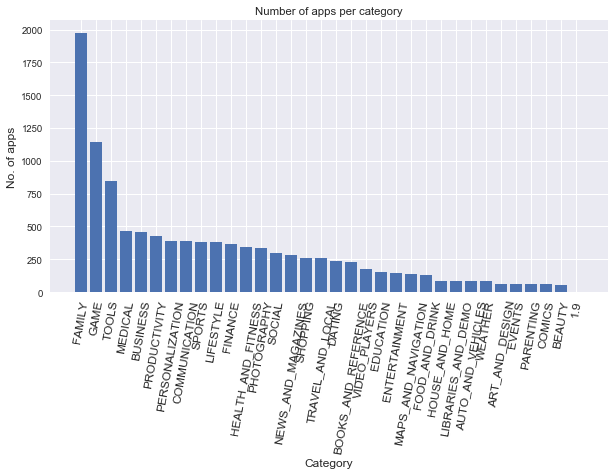

In [317]:
plt.figure(figsize=(10,5))
index = np.arange(len(number_of_apps_in_category.Category))
plt.bar(index, number_of_apps_in_category.Count_cat)
plt.xlabel('Category', fontsize=12)
plt.ylabel('No. of apps', fontsize=12)
plt.xticks(index, number_of_apps_in_category.Category, fontsize=12, rotation=80)
plt.title('Number of apps per category')
plt.show()

### Insight 3 - is the count of Paid Apps less than Free apps? 

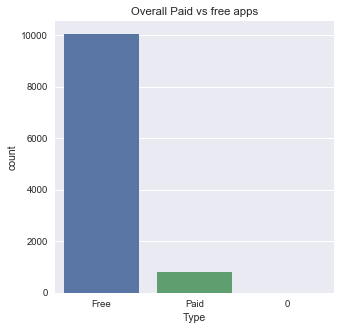

In [154]:
sns.countplot(x="Type",data=data_file_app)
plt.title('Overall Paid vs free apps')
plt.show()

### Insight 4 - Top categories of paid apps

In [337]:
data_file_app1 = data_file_app[data_file_app['Type']=='Paid']
number_of_apps_in_category_typ = data_file_app1['Category'].value_counts().sort_values(ascending=False)
number_of_apps_in_category_typ = number_of_apps_in_category_typ.reset_index()
number_of_apps_in_category_typ.columns = ["Category","Count_cat"]
number_of_apps_in_category_typ['perc'] = (number_of_apps_in_category_typ['Count_cat']/number_of_apps_in_category_typ['Count_cat'].sum())*100
number_of_apps_in_category_typ.head(5)


,Category,Count_cat,perc
0,FAMILY,191,23.875
1,MEDICAL,109,13.625
2,GAME,83,10.375
3,PERSONALIZATION,83,10.375
4,TOOLS,78,9.750


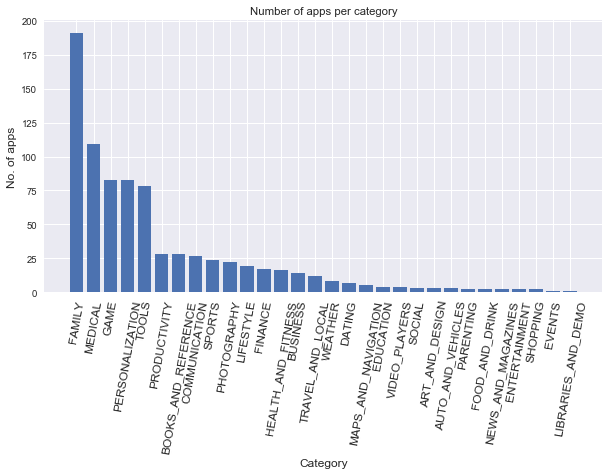

In [338]:
plt.figure(figsize=(10,5))
index = np.arange(len(number_of_apps_in_category_typ.Category))
plt.bar(index, number_of_apps_in_category_typ.Count_cat)
plt.xlabel('Category', fontsize=12)
plt.ylabel('No. of apps', fontsize=12)
plt.xticks(index, number_of_apps_in_category_typ.Category, fontsize=12, rotation=80)
plt.title('Number of apps per category')
plt.show()

Data Cleaning and restoring variable data types:

In [318]:
data_file_app = data_file_app[data_file_app.Reviews.apply(lambda x: x.isnumeric())]
data_file_app['Reviews'] = data_file_app.Reviews.astype(int)

In [319]:
data_file_app['Installs'] = data_file_app['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data_file_app['Installs'] = data_file_app['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
data_file_app['Installs'] = data_file_app['Installs'].apply(lambda x: int(x))
data_file_app['Installs'] = data_file_app['Installs'].apply(lambda x: float(x)) 

In [320]:
data_file_app['Size'] = data_file_app['Size'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
data_file_app['Size'] = data_file_app['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
data_file_app['Size'] = data_file_app['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data_file_app['Size'] = data_file_app['Size'].apply(lambda x: str(x).replace('k', '') if 'k' in str(x) else x)
data_file_app['Size'] = data_file_app['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
#data_file_app['Size'] = data_file_app['Size'].apply(lambda x: int(x))
data_file_app['Size'] = data_file_app['Size'].apply(lambda x: float(x)) 

In [321]:
data_file_app['Price'] = data_file_app['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
#data_file_app['Price'] = data_file_app['Price'].apply(lambda x: int(x))
data_file_app['Price'] = data_file_app['Price'].apply(lambda x: float(x)) 

All cleaned dataframe:

In [322]:
data_file_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [323]:
data_file_app['Rating'] = data_file_app['Rating'].apply(lambda x: float(x) < 5)
#data_file_app['Price'] = data_file_app['Price'].apply(lambda x: int(x))
data_file_app['Rating'] = data_file_app['Rating'].apply(lambda x: float(x)) 
data_file_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,1.0,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,1.0,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,1.0,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,1.0,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,1.0,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [295]:
data_file_app['Reviews'] = data_file_app.Reviews.astype(int)
data_file_app['Price'] = data_file_app.Price.astype(object)
data_file_app['Size'] = data_file_app.Size.dropna().astype(int)
data_file_app['Installs'] = data_file_app.Installs.astype(int)


data_file_app.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Insight 5 - Rating vs price, size and installs

C:\Users\mruna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


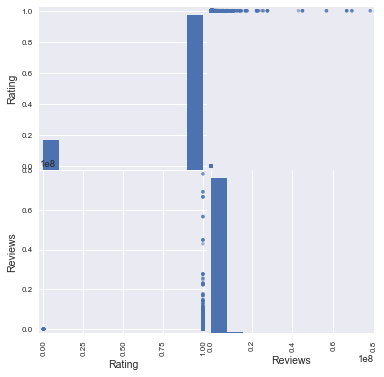

In [325]:
#data_file_app_num = data_file_app[["Rating", "Reviews", "Size", "Installs"]]
data_file_app_rev = data_file_app[["Rating", "Reviews"]]
pd.scatter_matrix(data_file_app_rev, figsize=(6, 6))
plt.show()

C:\Users\mruna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


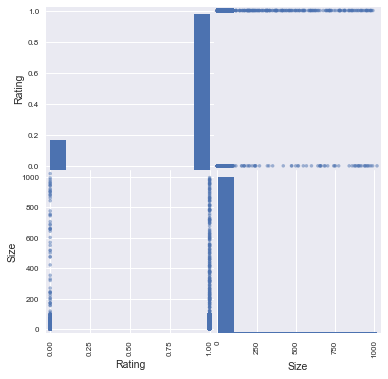

In [327]:
#data_file_app_num = data_file_app[["Rating", "Reviews", "Size", "Installs"]]
data_file_app_siz = data_file_app[["Rating", "Size"]]
pd.scatter_matrix(data_file_app_siz, figsize=(6, 6))
plt.show()

C:\Users\mruna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


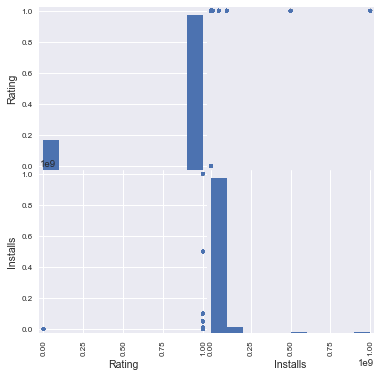

In [328]:
#data_file_app_num = data_file_app[["Rating", "Reviews", "Size", "Installs"]]
data_file_app_ins = data_file_app[["Rating", "Installs"]]
pd.scatter_matrix(data_file_app_ins, figsize=(6, 6))
plt.show()

# Thank you!